<xarray.DataArray 'temp' (bottom_top: 33)>
array([ 23.00296  ,  21.963196 ,  20.818787 ,  19.583832 ,  18.377655 ,
        17.250824 ,  16.120148 ,  14.79129  ,  13.173035 ,  11.387573 ,
         9.634491 ,   7.9542847,   6.3418274,   4.750885 ,   3.150116 ,
         1.5259094,  -0.0824585,  -1.6201172,  -3.4706116,  -5.503662 ,
        -7.7433777, -10.368469 , -13.297455 , -16.502869 , -20.686783 ,
       -26.108475 , -32.41681  , -39.50322  , -47.80571  , -57.50232  ,
       -68.28389  , -73.89909  , -70.35939  ], dtype=float32)
Coordinates:
    XLONG    float32 120.940186
    XLAT     float32 28.828064
    XTIME    float32 850.0
    Time     datetime64[ns] 2019-08-09T20:10:00
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:      104
    MemoryOrder:    XYZ
    description:    temperature
    units:          degC
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     LambertConformal(stand_lon=121.125, moad_cen_lat=29.20597...
    _FillValu

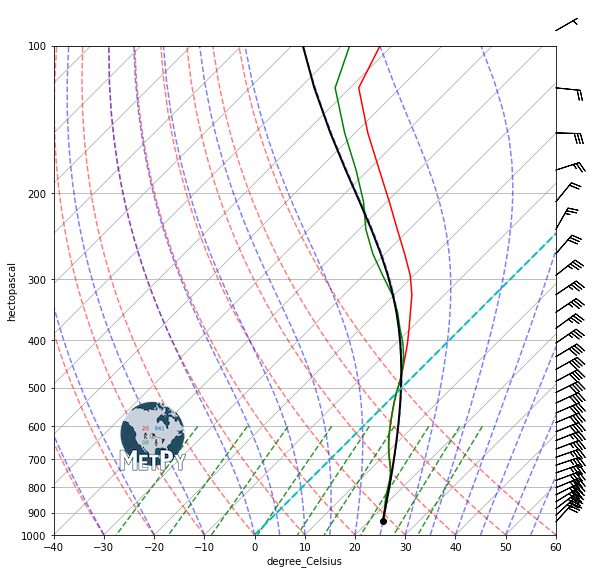

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

import matplotlib.pyplot as plt
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)
# Extract the model height and wind speed
time =85
lat_num = 62
lon_num = 85

z = getvar(ncfile, "z")[:,lat_num,lat_num]
p = getvar(ncfile, "p", units="hPa")[:,lat_num,lon_num]
t = getvar(ncfile, "temp", units="degC",timeidx=85)[:,lat_num,lon_num]
td = getvar(ncfile, "td",timeidx=85)[:,lat_num,lon_num] 
u = getvar(ncfile, "ua",timeidx=85)[:,lat_num,lon_num]
v = getvar(ncfile, "va",timeidx=85)[:,lat_num,lon_num]
#uc = getvar(ncfile, "ua",timeidx=85)
print(t)
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=85, units="m s-1")[0,:]




fig = plt.figure(figsize=(9, 9))
add_metpy_logo(fig, 115, 100)
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(p, t, 'r')
skew.plot(p, td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)



# Calculate LCL height and plot as black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], t[0], td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
#skew.shade_cin?
#skew.shade_cin(p,t,prof)
#skew.shade_cape(p,t,prof)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()





